In [1]:
import sxs

num = '0042'
catalog = sxs.load("catalog")
dataframe = catalog.table
dataframe[dataframe.index == 'SXS:BBH:'+str(num)][["reference_mass_ratio", "reference_chi_eff", "reference_eccentricity", "initial_separation", 'initial_dimensionless_spin1', 'initial_dimensionless_spin2', "reference_time"]]

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer


,reference_mass_ratio,reference_chi_eff,reference_eccentricity,initial_separation,initial_dimensionless_spin1,initial_dimensionless_spin2,reference_time
SXS:BBH:0042,3.001345,-0.324025,0.000462,12.0,"[0.250000000022, 3.46660000001e-12, -0.4330130...","[-1.33210088e-08, 1.32841e-09, -3.75696989999e...",160.0


Found the following files to load from the SXS catalog:
    SXS:BBH:0042v5/Lev4/rhOverM_Asymptotic_GeometricUnits_CoM.h5


Text(0, 0.5, '$r\\, h^{(\\ell,m)}/M$')

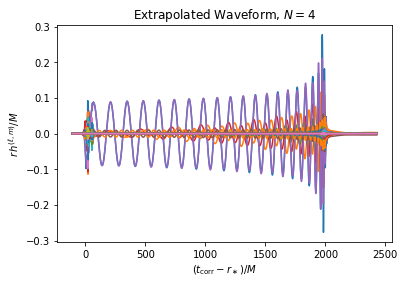

In [2]:
import matplotlib.pyplot as plt

extrapolation_order = 4
waveform = sxs.load("SXS:BBH:"+str(num)+"/Lev/rhOverM", extrapolation_order=extrapolation_order)
plt.plot(waveform.t, waveform.data.real)
plt.title(f"Extrapolated Waveform, $N={extrapolation_order}$")
plt.xlabel(r"$(t_{\mathrm{corr}} - r_\ast)/M$")
plt.ylabel(r"$r\, h^{(\ell,m)}/M$")

Found the following files to load from the SXS catalog:
    SXS:BBH:0254v5/Lev5/Horizons.h5


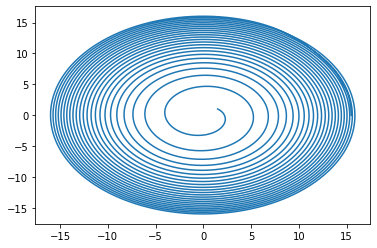

In [2]:
import matplotlib.pyplot as plt

horizons = sxs.load("SXS:BBH:"+str(num)+"/Lev/Horizons.h5")
x = horizons.A.coord_center_inertial[:,0] - horizons.B.coord_center_inertial[:,0]
y = horizons.A.coord_center_inertial[:,1] - horizons.B.coord_center_inertial[:,1]
plt.plot(x,y)

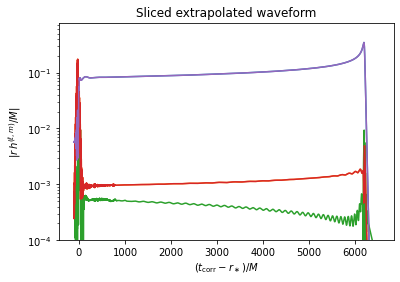

In [4]:
w_ell2 = waveform[:, :5]

plt.semilogy(w_ell2.t, w_ell2.abs)
plt.ylim(bottom=1e-4)
plt.title(f"Sliced extrapolated waveform")
plt.xlabel(r"$(t_{\mathrm{corr}} - r_\ast)/M$")
plt.ylabel(r"$\left| r\, h^{(\ell,m)}/M \right|$");

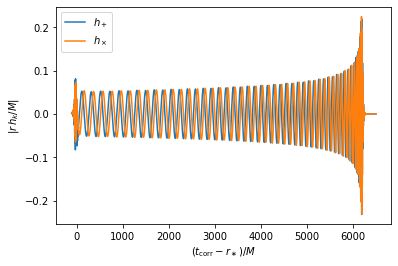

In [5]:
θ, ϕ = 0.1, 0.2
s = waveform.evaluate(θ, ϕ)

plt.plot(s.t, s.real, label=r"$h_+$")
plt.plot(s.t, -s.imag, label=r"$h_\times$")
plt.xlabel(r"$(t_{\mathrm{corr}} - r_\ast)/M$")
plt.ylabel(r"$\left| r\, h_k/M \right|$")
plt.legend()